# Community detection in the Southern Women network via OtrisymNMF

This dataset documents the participation of 18 women in 14 social events held in a Southern town in the United States. The bipartite network is composed of 32 nodes, 18 for women and 14 for events. An edge exists between a woman and an event if the woman attended that event.

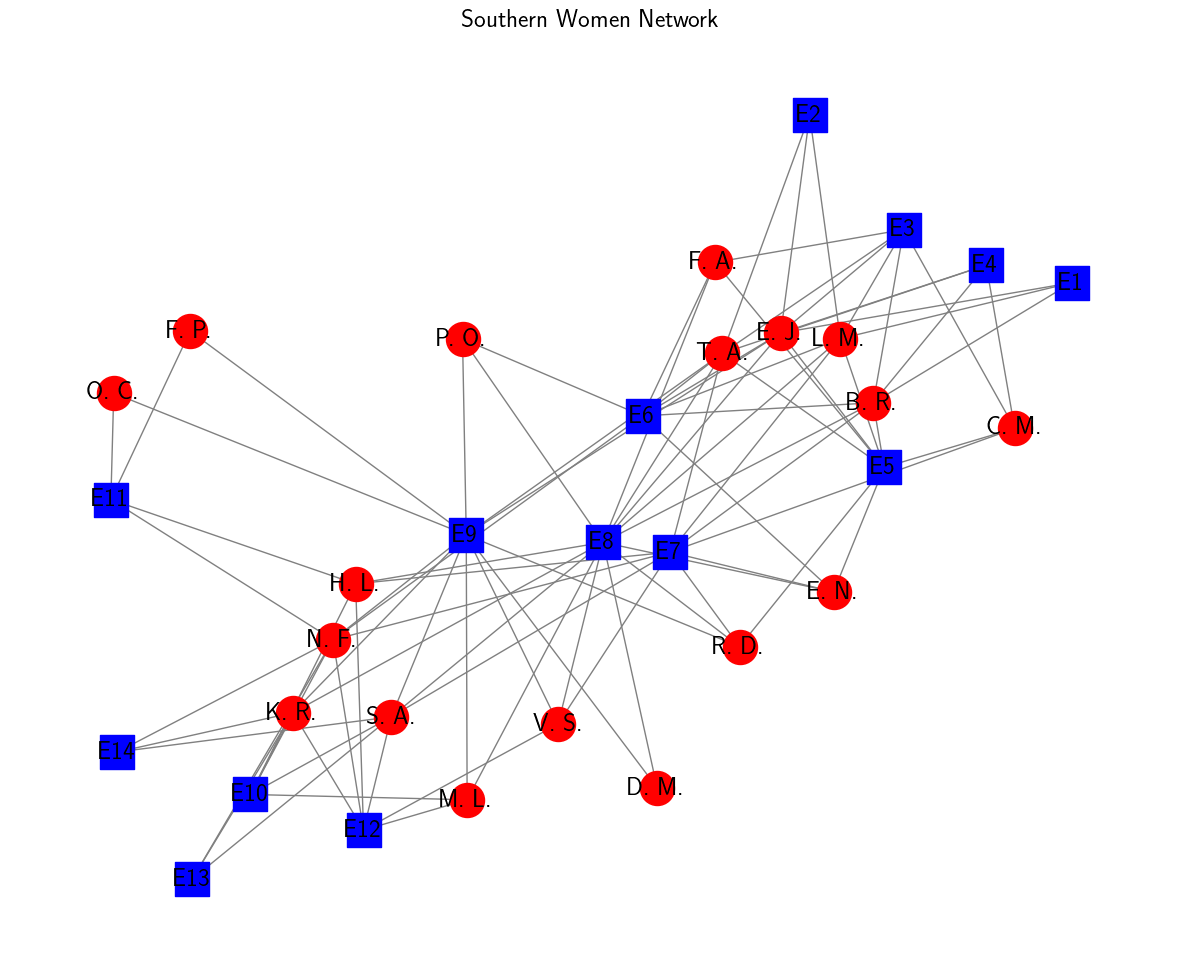

In [12]:
import networkx as nx # useful python package for networks and graphs
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True  # Active le rendu LaTeX
G = nx.davis_southern_women_graph() # Get the Southern Women network
# Recovery of the women and events from node's graph
women = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
events = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

# Network Display
pos = nx.spring_layout(G, seed=12)


node_list = list(G.nodes())
plt.figure(figsize=(15,12))

nx.draw_networkx_nodes(G, pos,
                       nodelist=women,
                       node_shape='o',
                       node_color='red',
                       node_size=600)

nx.draw_networkx_nodes(G, pos,
                       nodelist=events,
                       node_color="blue",
                       node_shape='s',
                       node_size=600)


nx.draw_networkx_edges(G, pos, edge_color='gray')
# labels
labels = {}
for n in G.nodes():
    if n in women:
        parts = n.split()
        initials = '. '.join(p[0] for p in parts) + '.'
        labels[n] = initials
    else:
        labels[n] = n  # garder les événements inchangés

# Affichage des labels personnalisés
nx.draw_networkx_labels(G, pos, labels=labels, font_size=18)

plt.title("Southern Women Network",fontsize=18)
plt.axis('off')
plt.show()


## Selecting the value of r, the number of communities

We aim to use OtrisymNMF to detect communities within the network. Since the number of communities r is unknown, we need to select a reasonable value for it.

To do this, we rely on the elbow method. This technique involves plotting the reconstruction error as a function of r, and identifying the point where the error reduction starts to level off — known as the elbow of the curve. Beyond this point, increasing r no longer significantly improves the reconstruction.

This approach allows us to choose a value of r that captures the general structure of the network while avoiding overfitting by adding unnecessary complexity.



Community: 1: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']
Community: 2: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


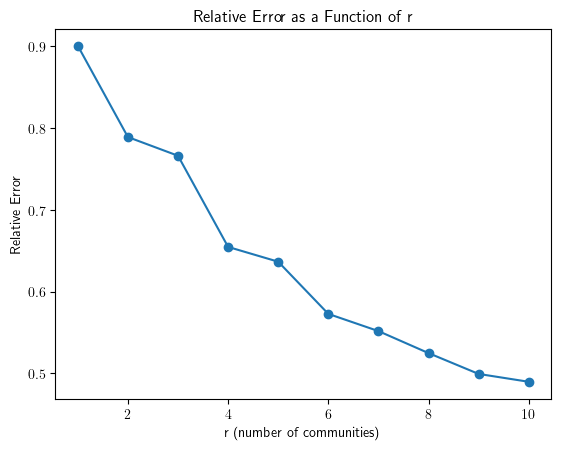

In [13]:
import OtrisymNMF
import matplotlib.pyplot as plt
import numpy as np
X = nx.adjacency_matrix(G) # adjacency matrix of the graph
errors=[]
r_listes=range(1,11)
for r in r_listes : # compute the factorization for different values of r
    w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X,r,update_rule="S_direct",numTrials=20,verbosity=0)
    if r==2:
        for i in range(max(v)+1):
            index=np.where(v == i)[0]
            print(f"Community: {i+1}: {[list(G.nodes())[j] for j in index] }")

    errors.append(error)
# Plot of the relative reconstruction error as a function of r
plt.plot(r_listes,errors,marker='o')
plt.title('Relative Error as a Function of r')
plt.xlabel('r (number of communities)')
plt.ylabel('Relative Error')
plt.show()

We choose r = 5, since the reconstruction error does not decrease significantly after this value.
## Community detection via OtrisymNMF with the chosen value of r
We detect the communities using OtrisymNMF with the selected value of r. Our method gives :
- v is a vector of length n (with n being the number of nodes) indicating the community index for each node.
- w is a vector of length n indicating the  importance of a node within its community.
- S describes interactions between the r communities.


Running 20 Trials in Series
Trial 1/20 with SSPA in 6 iterations: Error 5.5079e-01 | Best: 5.5079e-01
Trial 2/20 with SVCA in 6 iterations: Error 5.9159e-01 | Best: 5.5079e-01
Trial 3/20 with SVCA in 5 iterations: Error 5.4909e-01 | Best: 5.4909e-01
Trial 4/20 with SVCA in 6 iterations: Error 6.1570e-01 | Best: 5.4909e-01
Trial 5/20 with SVCA in 4 iterations: Error 5.5125e-01 | Best: 5.4909e-01
Trial 6/20 with SVCA in 5 iterations: Error 5.4909e-01 | Best: 5.4909e-01
Trial 7/20 with SVCA in 4 iterations: Error 5.5125e-01 | Best: 5.4909e-01
Trial 8/20 with SVCA in 5 iterations: Error 5.5079e-01 | Best: 5.4909e-01
Trial 9/20 with SVCA in 4 iterations: Error 5.5156e-01 | Best: 5.4909e-01
Trial 10/20 with SVCA in 7 iterations: Error 6.9949e-01 | Best: 5.4909e-01
Trial 11/20 with SVCA in 5 iterations: Error 5.9423e-01 | Best: 5.4909e-01
Trial 12/20 with SVCA in 6 iterations: Error 5.4909e-01 | Best: 5.4909e-01
Trial 13/20 with SVCA in 4 iterations: Error 5.7977e-01 | Best: 5.4909e-01
Trial 

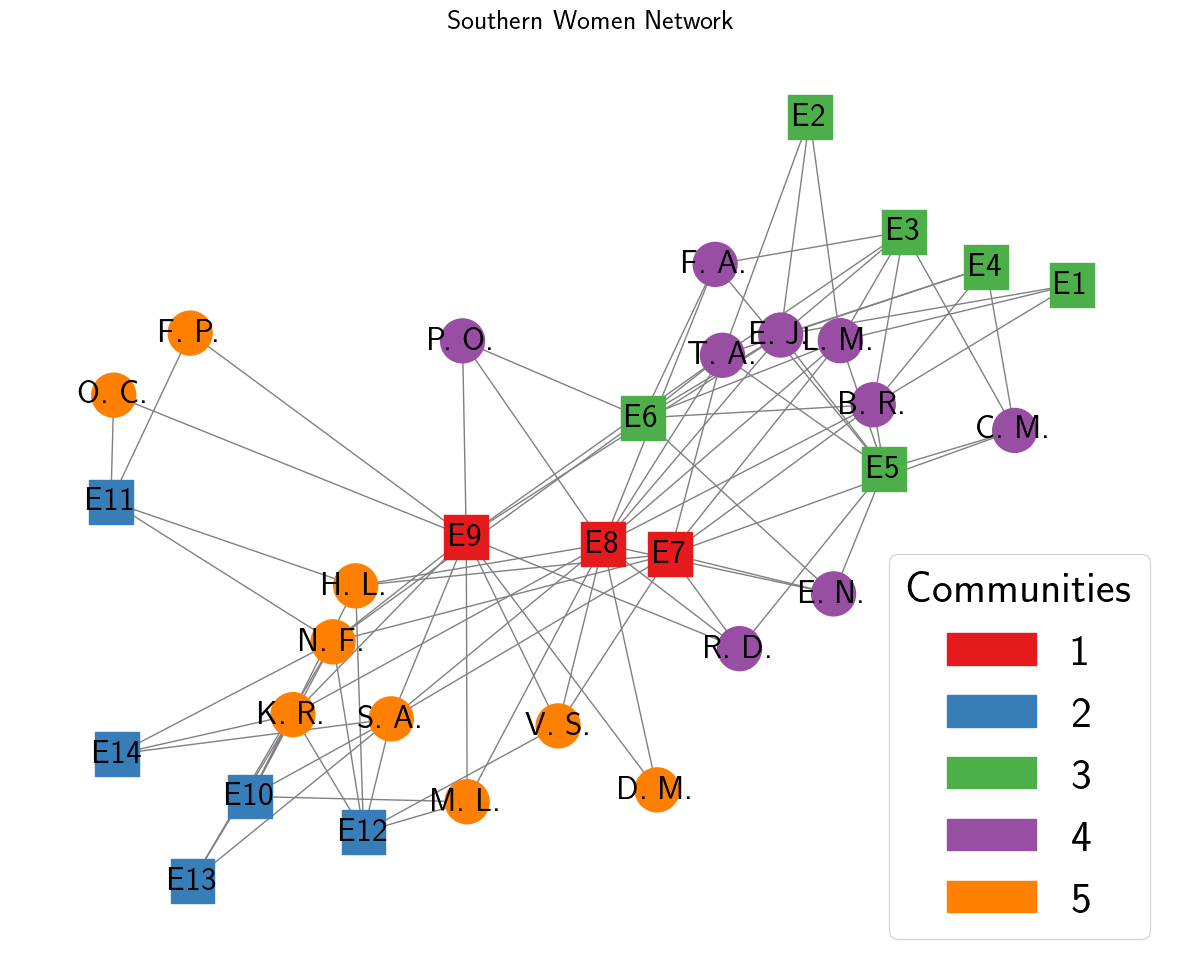

In [15]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import random
import numpy as np

random.seed(45)
np.random.seed(19)
X = nx.adjacency_matrix(G) #adjacency matrix
r=5
w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X,r,numTrials=20,verbosity=1)


# Graph Display with labels v
pos = nx.spring_layout(G, seed=12)
plt.rcParams['text.usetex'] = True  # Active le rendu LaTeX
colors = ['#E41A1C',  # rouge vif
          '#377EB8',  # bleu soutenu
          '#4DAF4A',  # vert modéré
          '#984EA3',  # violet foncé
          '#FF7F00']  # orange vif


node_list = list(G.nodes())
node_colors = [colors[v[i]] for i in range(len(node_list))]
plt.figure(figsize=(15,12))

nx.draw_networkx_nodes(G, pos,
                       nodelist=women,
                       node_color=[node_colors[node_list.index(n)] for n in women],
                       node_shape='o',
                       node_size=1000)

nx.draw_networkx_nodes(G, pos,
                       nodelist=events,
                       node_color=[node_colors[node_list.index(n)] for n in events],
                       node_shape='s',
                       node_size=1000)


nx.draw_networkx_edges(G, pos, edge_color='gray')


nx.draw_networkx_labels(G, pos, labels=labels, font_size=24)
legend_patches = []
for i in range(5):  # 5 communities
    patch = mpatches.Patch(color=colors[i], label=f'{i+1}')
    legend_patches.append(patch)

plt.legend(handles=legend_patches, loc='lower right', fontsize=32, title_fontsize=32, title="Communities")
plt.title("Southern Women Network",fontsize=20)
plt.axis('off')
plt.show()

The five communities identified by OtrisymNMF in the Southern Women network, with women (circles) and events (squares) clearly separated, and each community represented by a distinct color

## Visualization of community interactions using the matrix S

Community: 1: ['E9', 'E10', 'E11', 'E12', 'E13', 'E14']
Community: 2: ['Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
Community: 3: ['E7', 'E8']
Community: 4: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand']
Community: 5: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']


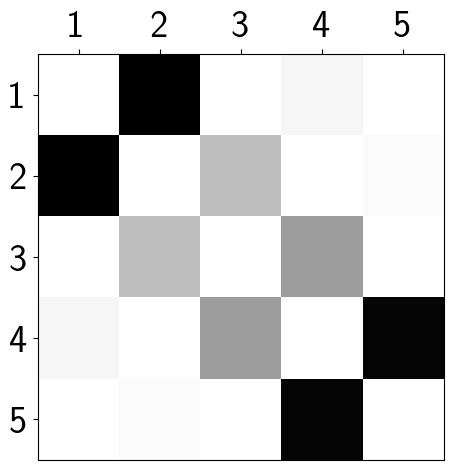

In [10]:
import numpy as np
# Print the communities
for i in range(max(v)+1):
    index=np.where(v == i)[0]
    print(f"Community: {i+1}: {[list(G.nodes())[j] for j in index] }")
# Display of S with a heatmap
plt.imshow(S, cmap='Greys')
#cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=14)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
labels = np.arange(1, S.shape[0] + 1)
plt.xticks(fontsize=28,ticks=np.arange(S.shape[1]), labels=labels)
plt.yticks(fontsize=28,ticks=np.arange(S.shape[0]), labels=labels)
#plt.title("Heatmap of matrix S\nInteraction between the communities", pad=30)
#plt.xlabel('Community j',fontsize=28)
#plt.ylabel('Community i',fontsize=28)
plt.tight_layout()
plt.show()

The matrix S provides a clearer interpretation of the community structure. The matrix S, clearly illustrating the bipartition and the interactions between communities.


## Community detection via DCBM (initialization SVCA)

In [11]:
import pysbm
from Utils import DC_BM
from sklearn.metrics import normalized_mutual_info_score as NMI

DCBM_partition=DC_BM(G,5,pysbm.DegreeCorrectedUnnormalizedLogLikelyhood,pysbm.EMInference, numTrials=5,verbosity=1,init_method="SVCA")
print(f" Normalized mutual information between the partition found by DCBM and the one found by OtrisymNMF :{NMI(DCBM_partition,v)}")



Trial 1/5 with SVCA : logP -7.3532e+02 | Best LogP: -7.3532e+02
Trial 2/5 with SVCA : logP -7.3532e+02 | Best LogP: -7.3532e+02
Trial 3/5 with SVCA : logP -7.3532e+02 | Best LogP: -7.3532e+02
Trial 4/5 with SVCA : logP -7.3532e+02 | Best LogP: -7.3532e+02
Trial 5/5 with SVCA : logP -7.5218e+02 | Best LogP: -7.3532e+02
Best logP : -735.3152336453757
 Normalized mutual information between the partition found by DCBM and the one found by OtrisymNMF :0.9527975284881028


The partition found by DCBM is the same as the one obtained by OtrisymNMF.